In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import mglearn
from sklearn.model_selection import train_test_split

def createDataSet():
    group = np.array([[1,101],[5,89],[108,5],[115,8]])
    labels=['爱情片','爱情片','动作片','动作片']
    return group, labels

X_train, y_train = createDataSet()
print(X_train)
print(y_train)

[[  1 101]
 [  5  89]
 [108   5]
 [115   8]]
['爱情片', '爱情片', '动作片', '动作片']


In [2]:
import operator

def KNN(X_train, X_test, y_train, k):
    X_train_size = X_train.shape[0]
    diffMat = np.tile(X_test, (X_train_size,1)) - X_train
    # print(diffMat)
    sqDiffmat = diffMat ** 2
    # print(sqDiffmat)
    sqDistances = sqDiffmat.sum(axis=1)
    # print(sqDistances)
    distances = sqDistances ** 0.5
    # print(distances)
    sortedDistIndices = distances.argsort()
    # print(sortedDistIndices)
    classCount = {}
    for i in range(k):
        # print(i,end=': ')
        ithLabel = y_train[sortedDistIndices[i]]
        # print(ithLabel)
        classCount[ithLabel] = classCount.get(ithLabel,0) + 1
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    # print(sortedClassCount)
    return sortedClassCount[0][0]

X_test = [101, 20]
y_test = KNN(X_train, X_test, y_train, 3)
print(y_test)

动作片


In [3]:
def file2matrix(filename):
    with open(filename) as fr:
        arrayOfLines = fr.readlines()
        numberOfLines = len(arrayOfLines)
        returnMat = np.zeros((numberOfLines,3))
        classLabelVector = []
        index = 0
        for line in arrayOfLines:
            line = line.strip()
            listFromLine = line.split('\t')
            returnMat[index,:] = listFromLine[0:3]
            if listFromLine[-1] == 'didntLike':
                classLabelVector.append(1)
            elif listFromLine[-1] == 'smallDoses':
                classLabelVector.append(2)
            elif listFromLine[-1] == 'largeDoses':
                classLabelVector.append(3)
            index += 1
        return returnMat, classLabelVector

fileName = 'data/helen.txt'
X_train, y_train = file2matrix(fileName)
print(X_train)
print(y_train)

[[4.0920000e+04 8.3269760e+00 9.5395200e-01]
 [1.4488000e+04 7.1534690e+00 1.6739040e+00]
 [2.6052000e+04 1.4418710e+00 8.0512400e-01]
 ...
 [2.6575000e+04 1.0650102e+01 8.6662700e-01]
 [4.8111000e+04 9.1345280e+00 7.2804500e-01]
 [4.3757000e+04 7.8826010e+00 1.3324460e+00]]
[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 1, 3, 1, 3, 1, 2, 1, 1, 2, 3, 3, 1, 2, 3, 3, 3, 1, 1, 1, 1, 2, 2, 1, 3, 2, 2, 2, 2, 3, 1, 2, 1, 2, 2, 2, 2, 2, 3, 2, 3, 1, 2, 3, 2, 2, 1, 3, 1, 1, 3, 3, 1, 2, 3, 1, 3, 1, 2, 2, 1, 1, 3, 3, 1, 2, 1, 3, 3, 2, 1, 1, 3, 1, 2, 3, 3, 2, 3, 3, 1, 2, 3, 2, 1, 3, 1, 2, 1, 1, 2, 3, 2, 3, 2, 3, 2, 1, 3, 3, 3, 1, 3, 2, 2, 3, 1, 3, 3, 3, 1, 3, 1, 1, 3, 3, 2, 3, 3, 1, 2, 3, 2, 2, 3, 3, 3, 1, 2, 2, 1, 1, 3, 2, 3, 3, 1, 2, 1, 3, 1, 2, 3, 2, 3, 1, 1, 1, 3, 2, 3, 1, 3, 2, 1, 3, 2, 2, 3, 2, 3, 2, 1, 1, 3, 1, 3, 2, 2, 2, 3, 2, 2, 1, 2, 2, 3, 1, 3, 3, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 1, 1, 1, 2, 3, 2, 1, 3, 1, 3, 2, 2, 3, 1, 3, 1, 1, 2, 1, 2, 2, 1, 

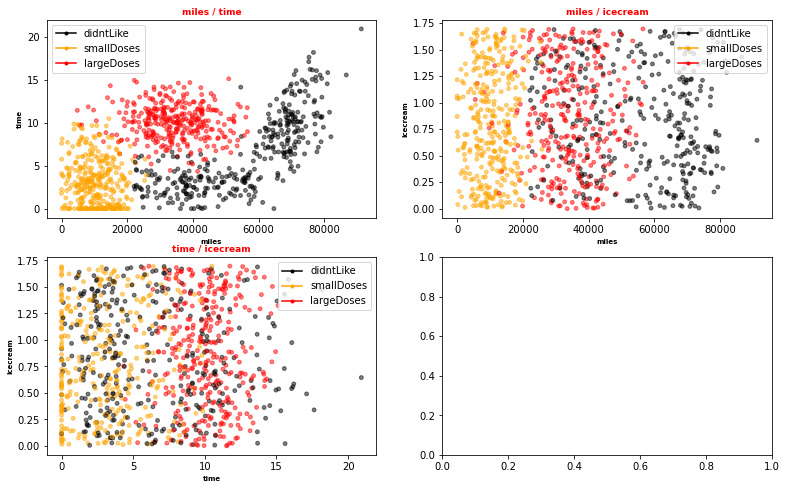

In [4]:
# from matplotlib.font_manager import FontProperties
import matplotlib.lines as mlines

def showdatas(datingDataMat, datingLabels):
    #设置汉字格式
    # font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)
    #将fig画布分隔成1行1列,不共享x轴和y轴,fig画布的大小为(13,8)
    #当nrow=2,nclos=2时,代表fig画布被分为四个区域,axs[0][0]表示第一行第一个区域
    fig, axs = plt.subplots(nrows=2, ncols=2,sharex=False, sharey=False, figsize=(13,8))
 
    numberOfLabels = len(datingLabels)
    LabelsColors = []
    for i in datingLabels:
        if i == 1:
            LabelsColors.append('black')
        if i == 2:
            LabelsColors.append('orange')
        if i == 3:
            LabelsColors.append('red')
    #画出散点图,以datingDataMat矩阵的第一(飞行常客例程)、第二列(玩游戏)数据画散点数据,散点大小为15,透明度为0.5
    axs[0][0].scatter(x=datingDataMat[:,0], y=datingDataMat[:,1], color=LabelsColors,s=15, alpha=.5)
    #设置标题,x轴label,y轴label
    axs0_title_text = axs[0][0].set_title(u'miles / time')
    axs0_xlabel_text = axs[0][0].set_xlabel(u'miles')
    axs0_ylabel_text = axs[0][0].set_ylabel(u'time')
    plt.setp(axs0_title_text, size=9, weight='bold', color='red') 
    plt.setp(axs0_xlabel_text, size=7, weight='bold', color='black') 
    plt.setp(axs0_ylabel_text, size=7, weight='bold', color='black')
 
    #画出散点图,以datingDataMat矩阵的第一(飞行常客例程)、第三列(冰激凌)数据画散点数据,散点大小为15,透明度为0.5
    axs[0][1].scatter(x=datingDataMat[:,0], y=datingDataMat[:,2], color=LabelsColors,s=15, alpha=.5)
    #设置标题,x轴label,y轴label
    axs1_title_text = axs[0][1].set_title(u'miles / icecream')
    axs1_xlabel_text = axs[0][1].set_xlabel(u'miles')
    axs1_ylabel_text = axs[0][1].set_ylabel(u'icecream')
    plt.setp(axs1_title_text, size=9, weight='bold', color='red') 
    plt.setp(axs1_xlabel_text, size=7, weight='bold', color='black') 
    plt.setp(axs1_ylabel_text, size=7, weight='bold', color='black')
 
    #画出散点图,以datingDataMat矩阵的第二(玩游戏)、第三列(冰激凌)数据画散点数据,散点大小为15,透明度为0.5
    axs[1][0].scatter(x=datingDataMat[:,1], y=datingDataMat[:,2], color=LabelsColors,s=15, alpha=.5)
    #设置标题,x轴label,y轴label
    axs2_title_text = axs[1][0].set_title(u'time / icecream')
    axs2_xlabel_text = axs[1][0].set_xlabel(u'time')
    axs2_ylabel_text = axs[1][0].set_ylabel(u'icecream')
    plt.setp(axs2_title_text, size=9, weight='bold', color='red') 
    plt.setp(axs2_xlabel_text, size=7, weight='bold', color='black') 
    plt.setp(axs2_ylabel_text, size=7, weight='bold', color='black')
    #设置图例
    didntLike = mlines.Line2D([], [], color='black', marker='.',
                      markersize=6, label='didntLike')
    smallDoses = mlines.Line2D([], [], color='orange', marker='.',
                      markersize=6, label='smallDoses')
    largeDoses = mlines.Line2D([], [], color='red', marker='.',
                      markersize=6, label='largeDoses')
    #添加图例
    axs[0][0].legend(handles=[didntLike,smallDoses,largeDoses])
    axs[0][1].legend(handles=[didntLike,smallDoses,largeDoses])
    axs[1][0].legend(handles=[didntLike,smallDoses,largeDoses])
    #显示图片
    plt.show()

X_train, y_train = file2matrix(fileName)
showdatas(X_train, y_train)

In [5]:
def autoNorm(X_train):
    # print(X_train)
    minVals = X_train.min(0)
    maxVals = X_train.max(0)
    # print(minVals, maxVals)
    ranges = maxVals - minVals
    normDataSet = np.zeros(np.shape(X_train))
    m = X_train.shape[0]
    normDataSet = X_train - np.tile(minVals, (m, 1))
    normDataSet = normDataSet / np.tile(ranges, (m, 1))
    return normDataSet, ranges, minVals

normDataSet, ranges, minVals = autoNorm(X_train)
print(normDataSet)
print(ranges)
print(minVals)

[[0.44832535 0.39805139 0.56233353]
 [0.15873259 0.34195467 0.98724416]
 [0.28542943 0.06892523 0.47449629]
 ...
 [0.29115949 0.50910294 0.51079493]
 [0.52711097 0.43665451 0.4290048 ]
 [0.47940793 0.3768091  0.78571804]]
[9.1273000e+04 2.0919349e+01 1.6943610e+00]
[0.       0.       0.001156]


In [6]:
def datingClassTest():
    hoRatio = 0.10
    m = normDataSet.shape[0]
    numTestVecs = int(m * hoRatio)
    errorCount = 0.0

    for i in range(numTestVecs):
        classifierResult = KNN(normDataSet[i, :], normDataSet[numTestVecs, :], y_train, 4)
        print('result: {}, real class: {}'.format(classifierResult, y_train[i]))
        if classifierResult != y_train[i]:
            errorCount += 1.0
    
    print('error rate: {}%'.format(errorCount/float(numTestVecs)*100))

datingClassTest()

result: 3, real class: 3
result: 3, real class: 2
result: 3, real class: 1
result: 3, real class: 1
result: 3, real class: 1
result: 3, real class: 1
result: 3, real class: 3
result: 3, real class: 3
result: 3, real class: 1
result: 3, real class: 3
result: 3, real class: 1
result: 3, real class: 1
result: 3, real class: 2
result: 3, real class: 1
result: 3, real class: 1
result: 3, real class: 1
result: 3, real class: 1
result: 3, real class: 1
result: 3, real class: 2
result: 3, real class: 3
result: 3, real class: 2
result: 3, real class: 1
result: 3, real class: 2
result: 3, real class: 3
result: 3, real class: 2
result: 3, real class: 3
result: 3, real class: 2
result: 3, real class: 3
result: 3, real class: 2
result: 3, real class: 1
result: 3, real class: 3
result: 3, real class: 1
result: 3, real class: 3
result: 3, real class: 1
result: 3, real class: 2
result: 3, real class: 1
result: 3, real class: 1
result: 3, real class: 2
result: 3, real class: 3
result: 3, real class: 3
